<h1>Cheminformatics Project on antidepressant SSRIs </h1>



<h3>Importing libraries </h3>

In [1]:
import pandas as pd
import numpy as np

<h3> Install  PYMAL </h3>

In [2]:
!pip install --ignore-installed PyYAML

  Using cached PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
lazypredict 0.2.9 requires click==7.1.2, but you have click 8.0.3 which is incompatible.
lazypredict 0.2.9 requires PyYAML==5.3.1, but you have pyyaml 6.0 which is incompatible.
lazypredict 0.2.9 requires six==1.15.0, but you have six 1.16.0 which is incompatible.


<h3>Install pyHamcrest </h3>

In [3]:
!pip install PyHamcrest

<h3> Install chembl web resource client </h3>

In [4]:
!pip install chembl_webresource_client

<h3>import chembl web resource client </h3>

In [5]:
from chembl_webresource_client.new_client import new_client

<h3> Search for Target protein </h3>

<h3>Target search for SSRIs</h3>

In [6]:
target = new_client.target
search_duery = target.search('ssr')
search_duery
moleculeTargets = pd.DataFrame.from_dict(search_duery)
moleculeTargets




,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P32745', 'xref_name': None, 'xre...",Homo sapiens,Somatostatin receptor 3,14.0,False,CHEMBL2028,"[{'accession': 'P32745', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P30936', 'xref_name': None, 'xre...",Rattus norvegicus,Somatostatin receptor 3,14.0,False,CHEMBL3340,"[{'accession': 'P30936', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'NBK23691', 'xref_name': 'Somatos...",Mus musculus,Somatostatin receptor 3,13.0,False,CHEMBL2238,"[{'accession': 'P30935', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,Translocon-associated protein subunit delta,13.0,False,CHEMBL4295777,"[{'accession': 'P51571', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Rattus norvegicus,Somatostatin receptor,7.0,False,CHEMBL2096977,"[{'accession': 'P30680', 'component_descriptio...",PROTEIN FAMILY,10116
5,[],Homo sapiens,Somatostatin receptor,7.0,False,CHEMBL2111436,"[{'accession': 'P35346', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Mus musculus,Somatostatin receptor,6.0,False,CHEMBL2111427,"[{'accession': 'P30935', 'component_descriptio...",PROTEIN FAMILY,10090


<h3>Select target from target_chembl_id</h3>

In [7]:
selectedTarget = moleculeTargets.target_chembl_id[0]
selectedTarget

'CHEMBL2028'

<h3>Retrieve the bioactivity data of the selected target </h3>

In [8]:
activity = new_client.activity
activities = activity.filter(target_chembl_id=selectedTarget).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(activities)
df.to_csv('molecules.csv')
df
# df.head(n=10)
# df.shape

# pd.set_option('display.max_columns', 45)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33929,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,13.0
1,None,43492,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,44718,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,447.0
3,None,47141,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,403.0
4,None,49831,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,None,18379656,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
735,None,18379657,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
736,None,18456676,[],CHEMBL4179567,Displacement of [125I]somatostatin-14 (Tyr11) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,360.0
737,None,18781762,[],CHEMBL4270250,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,119.0


In [9]:
df.standard_type.unique()

array(['IC50'], dtype=object)

<h5> Save bioactivity (IC50) to a csv file </h5>

In [10]:
df.to_csv('bioactivity_sr3_ic50.csv', index=False)

<h5> CHeck if there is any missing data in our dataset</h5>

In [11]:
dataframe2 = df[df.standard_value.notna()]
dataframe2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33929,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,13.0
1,None,43492,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,44718,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,447.0
3,None,47141,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,403.0
4,None,49831,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,None,18379656,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
735,None,18379657,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
736,None,18456676,[],CHEMBL4179567,Displacement of [125I]somatostatin-14 (Tyr11) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,360.0
737,None,18781762,[],CHEMBL4270250,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,119.0


In [59]:
bioactivity_list = []
for i in dataframe2.standard_value:
    if float(i) >= 10000:
        bioactivity_list.append("inactive")
    elif float(i) <= 1000:
            bioactivity_list.append("active")
    else:
            bioactivity_list.append("intermediate")
            bioactivity_list

In [60]:
dataframe2.molecule_chembl_id

0      CHEMBL1824055
1      CHEMBL2371100
2      CHEMBL3350907
3      CHEMBL2371070
4      CHEMBL3350888
           ...      
734    CHEMBL4165525
735    CHEMBL4176134
736    CHEMBL4217405
737    CHEMBL4288417
738    CHEMBL4282052
Name: molecule_chembl_id, Length: 734, dtype: object

In [61]:
mol_cid = []
for i in dataframe2.molecule_chembl_id:
    mol_cid.append(i)    

In [62]:
canonical_smiles = []
for i in dataframe2.canonical_smiles:
    canonical_smiles.append(i)

In [63]:
standard_value = []
for i in dataframe2.standard_value:
    standard_value.append(i)

In [91]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
dataFrame3 = dataframe2[selection]
dataFrame3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,750.0
...,...,...,...
734,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,20000.0
735,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,20000.0
736,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,360.0
737,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,119.0


In [92]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_list, standard_value))
# dataframe4 = pd.concat([dataFrame3, pd.Series(bioactivity_list)], axis=1)
dataframe4 = pd.DataFrame(data_tuples, columns=['mol_cid', 'canonical_smiles', 'bioactivity_list', 'standard_value'])
dataframe4

,mol_cid,canonical_smiles,bioactivity_list,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0
...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,20000.0
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0


In [93]:
pd.concat([dataFrame3, pd.Series(bioactivity_list)], axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,13.0,active
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,14.0,active
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,447.0,active
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,403.0,active
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,750.0,active
...,...,...,...,...
734,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,20000.0,NaN
735,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,20000.0,NaN
736,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,360.0,NaN
737,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,119.0,NaN


In [95]:
dataframe4.to_csv('bioactivity_preprocessed.csv', index=False)

<h3>Phase II of the computation begins here </h3>
<h4> Import rdkit library which is used for Chemical computation</h4>

In [96]:
import pandas as pd
newdf = pd.read_csv('bioactivity_preprocessed.csv') 
new_df = newdf.dropna()
new_df

,mol_cid,canonical_smiles,bioactivity_list,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0
...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,20000.0
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0


In [97]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### About Lipinski Descriptors
Christopher Lpinski descriptor is used to predict the ADME Pharmokinetic properties of molecules or the druglikeness of molecules. The lipinski rule can be used to determine the following chemical properties:
<li> Molecular weight < 500 Dalton </li>
<li> Octanol-water partition coefficient (LogP) < 5 </li>
<li> Hydrogen bond donors < 5 </li>
<li> Hydrogen bond acceptors < 10 </li>

<h4> write lipinski function which takes the smile argument. The smile arguement is used to calculate the chemical properties </h4>

In [98]:
#  code adapted from dataprofessor and https://codeocean.com/capsule/8848590/tree/v1

def generateDescriptors(smiles, verbose=False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)
        desc_NumHDonors = Descriptors.NumHDonors(mol)
                
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHAcceptors,desc_NumHDonors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolWt","MolLogP","NumHAcceptors","NumHDonors"]   
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
#     print("Total descriptors generated: 17 x "+str(len(smiles)))
    return descriptors

In [99]:
# dff = newdf[newdf.standard_value.notna()]
df_lipinski = generateDescriptors(new_df.canonical_smiles)
df_lipinski

,MolWt,MolLogP,NumHAcceptors,NumHDonors
0,1079.316,1.14880,13.0,12.0
1,1120.365,2.08730,14.0,12.0
2,1122.341,1.27170,14.0,12.0
3,1122.341,1.27170,14.0,12.0
4,1003.218,-0.07400,13.0,12.0
...,...,...,...,...
725,889.104,3.29580,10.0,2.0
726,885.072,2.71470,10.0,2.0
727,668.692,5.74482,5.0,3.0
728,517.620,7.19890,4.0,1.0


<h5> Combine dataframe3 and generated lipinski descriptors dataframe </5>

In [100]:
dfCombined = pd.concat([newdf, df_lipinski], axis = 1)
dfCombined

,mol_cid,canonical_smiles,bioactivity_list,standard_value,MolWt,MolLogP,NumHAcceptors,NumHDonors
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0,1079.316,1.1488,13.0,12.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0,1120.365,2.0873,14.0,12.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0,1122.341,1.2717,14.0,12.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0,1122.341,1.2717,14.0,12.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0,1003.218,-0.0740,13.0,12.0
...,...,...,...,...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,20000.0,660.661,6.6407,6.0,2.0
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0,NaN,NaN,NaN,NaN
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0,NaN,NaN,NaN,NaN
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0,NaN,NaN,NaN,NaN


<h5> Convert IC50 to pIC50 </h5>
IC50 is the concentration of the molecule at 50%
pIC50 = log10(IC50). This is done because IC50 is unevenly distributed Steps to convert are
<ol>
<li>Multiply IC50 in the standard_value column by 10-9 to convert it from nanoMolar to Molar </li>
<li> multiply by -log10 </li>
<li> drop the standard_value column and add a new pIC50 column </li>
</ol>

In [101]:
# adapted from https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_ROS.ipynb

def convert_to_pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
#         convert from nM to M
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))
    
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x

In [102]:
dfCombined.standard_value.describe()

count      734.000000
mean       733.070572
std       2129.415913
min          0.150000
25%         13.000000
50%        184.000000
75%       1000.000000
max      20000.000000
Name: standard_value, dtype: float64

##### NB: Values greater than 100,000,000 will return a negative value which is illustrated below.  To avoid this normalize the standard value such that standard values greater than 100, 000, 000 are normalized to 100, 000, 000

In [103]:
-np.log10((10**-9) * 100000000)


1.0

In [104]:
-np.log10((10**-9) * 10000000000)

-1.0

In [105]:
#normalize funtion. 

def norm_value(input):
    norm = []
    
    for i in input ['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
            
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

In [106]:
df_norm = norm_value(dfCombined)
df_norm

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,standard_value_norm
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.1488,13.0,12.0,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.0873,14.0,12.0,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.2717,14.0,12.0,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.2717,14.0,12.0,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.0740,13.0,12.0,750.0
...,...,...,...,...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,660.661,6.6407,6.0,2.0,20000.0
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,NaN,NaN,NaN,NaN,20000.0
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,NaN,NaN,NaN,NaN,360.0
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,NaN,NaN,NaN,NaN,119.0


In [107]:
df_final = convert_to_pIC50(df_norm)
df_final

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.1488,13.0,12.0,7.886057
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.0873,14.0,12.0,7.853872
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.2717,14.0,12.0,6.349692
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.2717,14.0,12.0,6.394695
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.0740,13.0,12.0,6.124939
...,...,...,...,...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,660.661,6.6407,6.0,2.0,4.698970
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,NaN,NaN,NaN,NaN,4.698970
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,NaN,NaN,NaN,NaN,6.443697
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,NaN,NaN,NaN,NaN,6.924453


In [108]:
df_final.to_csv('bioactivity_stage_threeII.csv')
df_final.pIC50.describe()

count    734.000000
mean       7.004915
std        1.077679
min        4.698970
25%        6.000000
50%        6.735208
75%        7.886057
max        9.823909
Name: pIC50, dtype: float64

<h4> Remove the intermediate biactivity class </h4>

In [109]:
df_rem_int_class = df_final[df_final.bioactivity_list != 'intermediate']
df_rem_int_class 

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.1488,13.0,12.0,7.886057
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.0873,14.0,12.0,7.853872
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.2717,14.0,12.0,6.349692
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.2717,14.0,12.0,6.394695
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.0740,13.0,12.0,6.124939
...,...,...,...,...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,660.661,6.6407,6.0,2.0,4.698970
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,NaN,NaN,NaN,NaN,4.698970
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,NaN,NaN,NaN,NaN,6.443697
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,NaN,NaN,NaN,NaN,6.924453


<h3> Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors </h3>

In [110]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')




<h3> Frequency plot of the two bioactivity classes (active and inactive) </h3>


C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


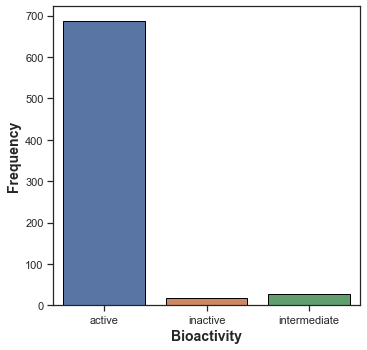

In [111]:
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x='bioactivity_list', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity', fontsize=14, fontWeight='bold')
plt.ylabel('Frequency', fontSize=14, fontWeight='bold')
plt.savefig('plot_bioactivity.pdf')


<h3> Scatter plot of MW vs LogP </h3>

C:\Users\Ephphatha\Anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\Ephphatha\Anaconda3\lib\site-packages\seaborn\relational.py:658: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  points = ax.scatter(*args, **kws)
C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


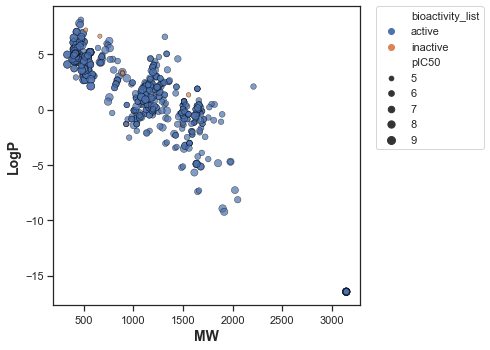

In [112]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWt', y='MolLogP', data=df_rem_int_class,hue='bioactivity_list', size='pIC50', edgeColor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontWeight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_W_vs_LogP.pdf') 

### Box plots

#### pIC50 value

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


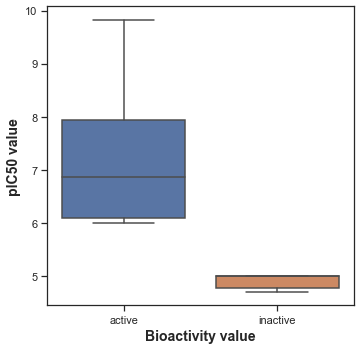

In [113]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_list', y = 'pIC50', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_IC50.pdf')

### Apply Mann-Whitney U Test to check the difference between the activa and inactive class

In [114]:
def mannWhitney(descriptor, verbose=False):
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'bioactivity_list'] 
    df = df_rem_int_class[selection]
    active = df[df.bioactivity_list == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_list'] 
    df = df_rem_int_class[selection]
    inactive = df[df.bioactivity_list == 'inactive']
    inactive = inactive[descriptor]
    
#     compare samples
    stat, p = mannwhitneyu(active, inactive)
# print('statistics%.3f, p=%.3f' %(stat, p))
# interpret
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor, 'Statistics':stat, 'P':p,
                          'alpha':alpha, 'Interpretation':interpretation}, index=[0])
    filename = 'manwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

### pIC50

In [115]:
mannWhitney ('pIC50')

,Descriptor,Statistics,P,alpha,Interpretation
0,pIC50,0.0,1.591174e-13,0.05,Different distribution (reject H0)


### MolWt

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


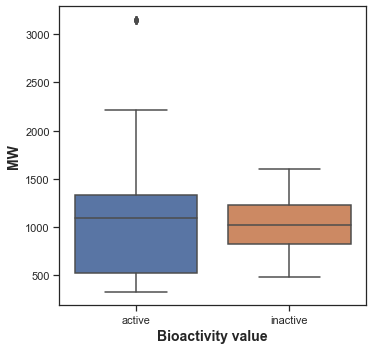

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'MolWt', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [117]:
mannWhitney('MolWt')

,Descriptor,Statistics,P,alpha,Interpretation
0,MolWt,5444.5,0.19091,0.05,Same distribution (fail to reject H0)


### LogP

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


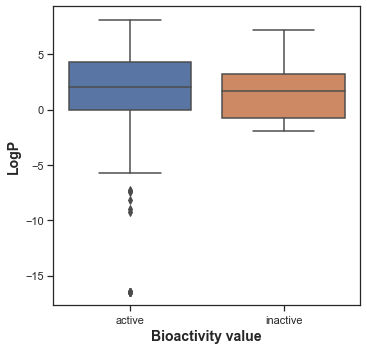

In [118]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'MolLogP', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [119]:
mannWhitney('MolLogP')

,Descriptor,Statistics,P,alpha,Interpretation
0,MolLogP,6017.5,0.41929,0.05,Same distribution (fail to reject H0)


### Number of Hydrogen Donors

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


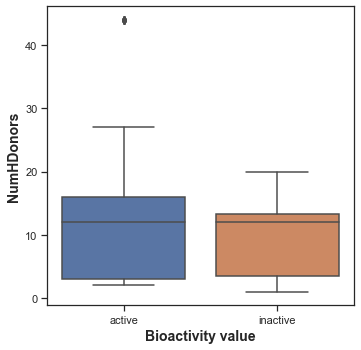

In [120]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'NumHDonors', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_num_hydrogen_donors.pdf')

In [121]:
mannWhitney('NumHDonors')

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHDonors,6083.5,0.44911,0.05,Same distribution (fail to reject H0)


C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


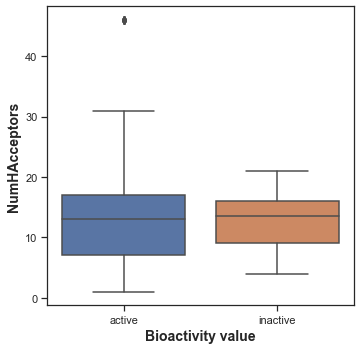

In [122]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'NumHAcceptors', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_num_hydrogen_acceptors.pdf')

In [123]:
mannWhitney('NumHAcceptors')

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHAcceptors,5303.0,0.148615,0.05,Same distribution (fail to reject H0)


## Interpretation of Statistical Results

### Box plots
#### pIC50

## PHASE III

### Install PADEL descriptor


In [124]:
import pandas as pd
!pip install padelpy


In [125]:
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip --no-check-certificate
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh --no-check-certificate

--2021-12-15 16:03:35--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-12-15 16:03:36--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip.3'

     0K .......... .......... .......... .......... ..........  0%  436K 58s
    50K ...

--2021-12-15 16:04:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2021-12-15 16:04:10--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: 'padel.sh.1'

     0K                                                       100%  358K=0.001s

2021-12-15 16:04:11 (358 KB

In [ ]:
! unzip padel.zip

### Load bioactivity data

In [12]:
stage3DataFrame = pd.read_csv('bioactivity_stage_3.csv')
stage3DataFrame.head()

,Unnamed: 0,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.1488,13.0,12.0,7.886057
1,1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.0873,14.0,12.0,7.853872
2,2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.2717,14.0,12.0,6.349692
3,3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.2717,14.0,12.0,6.394695
4,4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.0740,13.0,12.0,6.124939


In [4]:
selection = ['canonical_smiles', 'mol_cid']
sdf3_selection = stage3DataFrame[selection]
sdf3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [5]:
! cat molecule.msi | head -5

C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL1824055
C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC1=O	CHEMBL2371100
C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)N(C)[C@@H](C(=O)c2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL3350907
C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)N(C)[C@@H](C(=O)c2ccccc2)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL2371070
C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC1=O	CHEMBL3350888


cat: write error: No space left on device


In [6]:
! type molecule.smi | wc -l

731


### Calculate PADEL Descriptors

In [7]:
! bash padel.sh

Cannot create results file.


Nov 13, 2021 10:40:15 PM libpadeldescriptor.PaDELResultsFile Open
SEVERE: Cannot create results file
java.io.FileNotFoundException: descriptors_output.csv (The process cannot access the file because it is being used by another process)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(Unknown Source)
	at java.io.FileOutputStream.<init>(Unknown Source)
	at java.io.FileOutputStream.<init>(Unknown Source)
	at libpadeldescriptor.PaDELResultsFile.Open(Unknown Source)
	at libpadeldescriptor.libPaDELDescriptorMaster.Initialize(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.StartCmd(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.launchCommandLine(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.main(Unknown Source)



### Prepare the X and Y Data Matrix

### X Variable

In [8]:
import pandas as pd

In [ ]:
df3_x = pd.read_csv('descriptors_output.csv')
df3_x

In [ ]:
df3_x = df3_x.drop(columns=['Name'])
df3_x

### Y Variable

### Convert IC50 to pIC50

In [ ]:
df3_y = stage3DataFrame['pIC50']
df3_y

### Combining X and Y Variable

In [ ]:
dfCombined3 = pd.concat([df3_x, df3_y], axis = 1)

In [ ]:
dfCombined3.to_csv('bioactivity_stage3_pic50_final.csv', index=False)

In [ ]:
df3_x.shape

In [ ]:
df3_y.shape


### Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1 - .8)))
x = selection.fit_transform(df3_x)

In [ ]:
x.shape

### Split Data in the ratio 80:20

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3_x, df3_y, test_size=0.2)
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

### Building a Regression Model Using Random Forest

In [ ]:
import numpy as np

np.random.seed(100)

antidepressionModel = RandomForestRegressor(n_estimators=100)
antidepressionModel.fit(x_train, y_train)
r2 = antidepressionModel.score(x_test, y_test)
r2

## Apply model to make prediction

In [ ]:
y_test_pred = antidepressionModel.predict(x_test)
y_train_pred = antidepressionModel.predict(y_train)

y_test_pred
y_train_pred

## Calculate model performance metric using Mathhew's correlation co-efficient

In [ ]:
matt_cc_train = matthew_corrcoef(y_train, y_train_pred)
matt_cc_train

In [ ]:
matt_cc_test = matthew_corrcoef(y_test, y_test_pred)
matt_cc_test

## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimator=500, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_scores

matt_cc_cv = cv_scores.mean()
matt_cc_cv

In [ ]:
# combine matt_cc_train, matt_cc_test and matt_cc_cv in a table

model_name = pd.Series(['Random forest'], name='Name')
matt_cc_test_series =  pd.Series(matt_cc_test, name='MCC_TEST')
matt_cc_train_series = pd.Series(matt_cc_train, name='MCC_TRAIN')
matt_cc_cv_series =  pd.Series(matt_cc_cv, name='MCC_CV')

performance_metrics = pd.concat([model_name, matt_cc_test_series, matt_cc_train_series, matt_cc_cv_series], axis-1)
performance_metrics.to_csv('performance_metrics.csv', index=False )

### Scatter Plot of Experimental Vs Predicted pIC50 Values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show



### Lazylist

In [ ]:
! pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor


In [ ]:
X = df3_x
Y = df3_y

### Data Pre-processing

In [ ]:
df3_x.shape

In [ ]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(df3_x)
X.shape


### Splitting Using 80/20 Ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, df3_y, test_size = 0.2)

### Compare ML Algorithmns

In [ ]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(x_train, x_test, y_train, y_test)


In [ ]:
train

In [ ]:
test

### Data Visualization of Model Performance

In [ ]:
# Bar plot of R-squared values

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize = (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))